#**Actividad 10: Integración - Melanie Muñoz Chavarria**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import sympy as sy

##**Integración por Trapecios**

###**Regla del trapecio**

Usando la formula $$\int_{a}^{b} f(x) dx= \frac {b-a}{2} (f(a)+f(b))- \frac {{(b-a)^{3}}}{12} f(\xi)$$


In [2]:
#Puntos y evaluaciones de los puntos sin una función inicialmente
x=np.array([1,2,3])
y=np.array([2,4,9])

In [3]:
#Para iniciar los valores de sumatoria
s=0
#Número de trapecios
trapecios=0

#Iteración para obtener la sumatoria
for i in range(0, len(x)-1):
  p=(((x[i+1]-x[i])/2)*(y[i]+y[i+1]))
  #print(p)
  s=s+p
  trapecios=trapecios+1


print(s)
print(trapecios)

9.5
2


In [4]:
#Generlaización

def integracion_trapecios(x,f):
  s=0
  for i in range(0, len(x)-1):
    p=abs(((x[i+1]-x[i])/2)*(f(x[i])+f(x[i+1])))
    s=s+p

  return s

Calculando la integral:
$$ \int_{0}^{10} x^{2} \ dx$$

In [5]:
#Probrando con una función
x_intervalo=np.linspace(0,10,1000)
f= lambda x: x**2

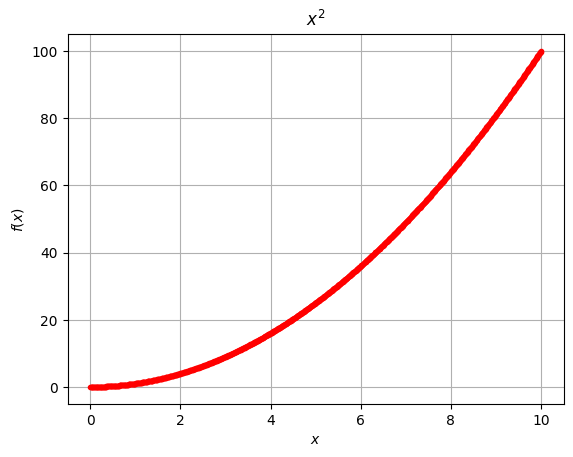

In [6]:
#Gráfica función
plt.figure()
plt.plot(x_intervalo,f(x_intervalo),'.r-')
plt.title('$x^2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()

In [7]:
#Valor de la integral
integral=integracion_trapecios(x_intervalo,f)
integral

333.3335003338342

In [8]:
x=np.linspace(1,2,5)

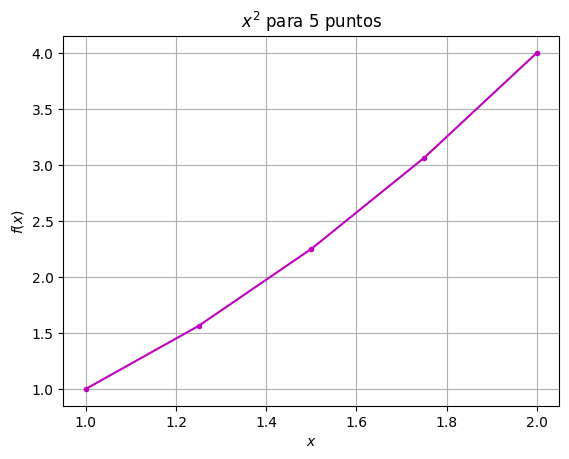

In [9]:
#Gráfico para un intervalo de puntos pequeño
plt.figure()
plt.title('$x^2$ para 5 puntos')
plt.plot(x,f(x),'.m-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()

###**Regla del Trapecio Compuesta**

Dada la formula: $$\int_{a}^{b} f(x) dx ≈ \frac {h}{2} [f(a)+ 2 \sum_{i=1}^{n-1} f(x_{i}) + f(b)] $$

Con $$h=\frac {b-a}{n}$$

In [10]:
h=x[1]+x[1]

#Vectorizando la ecuación
integral=(f(x[0])+f(x[-1])+2*f(x[1:-1]).sum())*0.5*h

integral

23.4375

In [11]:
#Generalizando de la vectorización
def integral_trap(f,a,b,N):
  x=np.linspace(a,b,int(N))
  h=(b-a)/N
  integral=(f(x[0])+f(x[-1])+2*f(x[1:-1]).sum())*0.5*h

  return integral


In [12]:
#Prueba de la integral de x**2 entre 0 y 1
A=integral_trap(f,0,10,1000)
A

333.00016683350015

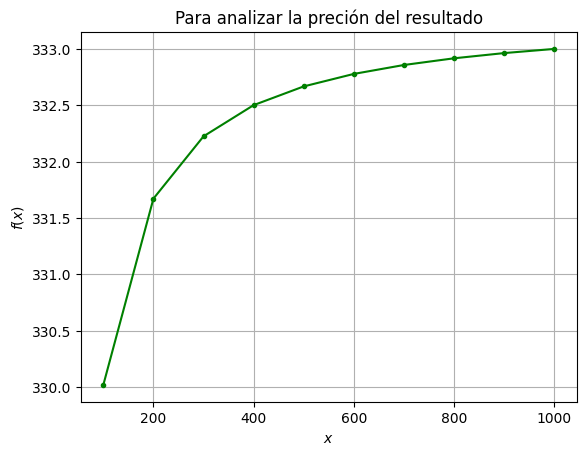

In [13]:
#Para calcular la precisión
N=np.linspace(100,1000,10)

areas=np.zeros(len(N))
for i,n_ in enumerate(N):
  areas[i]= integral_trap(f,0,10,n_)


plt.figure()
plt.title('Para analizar la preción del resultado')
plt.plot(N,areas,'.g-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()

###**Comparación con el método de trapecios de scipy**

In [14]:
#Comparando con scipy
resultado_scipy=sc.integrate.trapezoid(f(x_intervalo), x_intervalo)

#El resulado de la ecación vetorizada
resultado_trapecio_vectorizado=integral_trap(f,0,10,1000)

#El resultado de la ecuación sin vectorizar
xi=x=np.linspace(0,10,1000)
resultado_trapecio=integracion_trapecios(xi,f)


print(f'El resulado de scipy comparado con el obtenido al alplicar la formula de la integral dada por trapecios compuesta {resultado_trapecio_vectorizado/resultado_scipy}')
print(f'El resulado de scipy comparado con el obtenido al alplicar la formula de la integral dada por trapecios {resultado_trapecio/resultado_scipy}')

El resulado de scipy comparado con el obtenido al alplicar la formula de la integral dada por trapecios compuesta 0.9989999999999999
El resulado de scipy comparado con el obtenido al alplicar la formula de la integral dada por trapecios 1.0000000000000004


###**Error asociado a la integración por trapecios**

La formula está dada por:
$$E=-\frac{(b-a)^{3}}{12n^{2}} f''(\epsilon)$$


Calculando la integral

$$\int_{0}^{2} (x-1)^{2} \frac{sin(x)}{3} +1  \ dx $$ y el error asociado.

In [15]:
#Tomando la función y calculando sus derivadas con sympy

x_=sy.Symbol('x_')
f= (((x_-1)**2)*(sy.sin(x_))/(3)) + 1

d1f=sy.diff(f,x_)
d2f=sy.diff(d1f,x_)

print(d1f)
print(d2f)

(x_ - 1)**2*cos(x_)/3 + (2*x_ - 2)*sin(x_)/3
-(x_ - 1)**2*sin(x_)/3 + 2*(2*x_ - 2)*cos(x_)/3 + 2*sin(x_)/3


In [16]:
f3=lambda x: (((x-1)**2)*np.sin(x)/(3)) + 1
d1_f3= lambda x: ((((x-1)**2)*np.cos(x))/3) + (((2*x-2)*np.sin(x))/3)
d2_f3= lambda x: -((x- 1)**2)*np.sin(x)/3 + 2*(2*x - 2)*np.cos(x)/3 + 2*np.sin(x)/3
d2_f3_invertida= lambda x: (-1)* (-((x- 1)**2)*np.sin(x)/3 + 2*(2*x - 2)*np.cos(x)/3 + 2*np.sin(x)/3) #Lo que para está función representa un minimo para d2_f3 es un máximo

#Valores de los extremos del intervalo [a,b]
b=2
a=0

#Error que se espera presenta el cálculo de la integral
E=1e-3

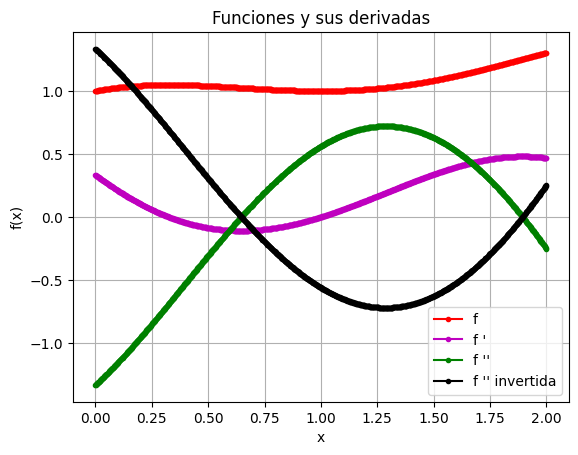

In [17]:
x1=np.linspace(a,b,1000)
plt.figure()
plt.plot(x1,f3(x1),'.r-', label="f")
plt.plot(x1,d1_f3(x1),'.m-', label="f '")
plt.plot(x1,d2_f3(x1),'.g-', label= "f ''")
plt.plot(x1,d2_f3_invertida(x1), '.k-', label="f '' invertida")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funciones y sus derivadas')
plt.grid()
plt.legend()

In [18]:
#Obteniendo el máximo de la segunda derivada en el intervalo [a,b]
maximo=sc.optimize.fmin_powell(d2_f3_invertida,0.01)
maximo

Optimization terminated successfully.
         Current function value: -0.720789
         Iterations: 2
         Function evaluations: 19


array([1.2873146])

In [19]:
#El número de trapecios dado el error es:

n=np.sqrt((((b-a)**3)/(12*E))*d2_f3(maximo))
n

array([21.92090641])

In [20]:
#Calculando la integral con el número de trapecios calculodos a partir de un error de 1e-3

integral_f3_vectorizado=integral_trap(f3,a,b,n[0])
integral_f3_vectorizado

1.9472385594071258

In [21]:
#Dado el error, ahora haciendo uso de scipy
x1_mejorado=np.linspace(a,b,int(n[0]))

integral_f3_sc_trap=sc.integrate.trapezoid(f3(x1_mejorado), x1_mejorado)
integral_f3_sc_trap

2.134261710942007

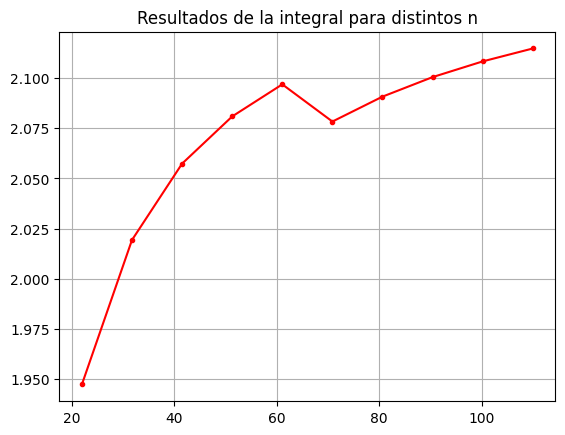

In [22]:
#Anaizando para distintos n, con la definición del código vectorizado
n_intervalo=np.linspace(n[0],110,10)

integral_valoresS=np.zeros(len(n_intervalo))

for i, n__ in enumerate(n_intervalo) :
  integral_valoresS[i]=integral_trap(f3,a,b,n__)

#Para analizar los resultados de la integral a partir del npumero resultante n del error 1e-3
plt.figure()
plt.plot(n_intervalo,integral_valoresS, '.r-')
plt.title('Resultados de la integral para distintos n')
plt.grid()


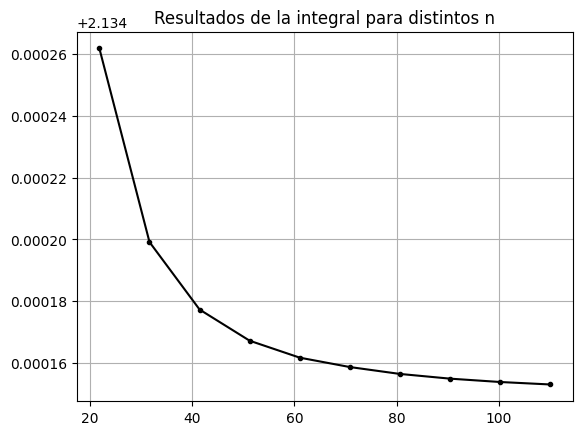

In [23]:
#Para analizar los resultados de la integral a partir del npumero resultante n del error 1e-3

integral_valoresSC=np.zeros(len(n_intervalo))
for i, n__ in enumerate(n_intervalo) :
  n_para_cada_n=np.linspace(a,b,int(n__))
  integral_valoresSC[i]=sc.integrate.trapezoid(f3(n_para_cada_n),n_para_cada_n)


plt.figure()
plt.plot(n_intervalo,integral_valoresSC, '.k-')
plt.title('Resultados de la integral para distintos n')
plt.grid()




##**Integral por el método de Simpson**

###**Regla de Simpson**

Donde la integral está dada por:
$$\int_{a}^{b} f(x) dx \approx \frac{b-a}{6}[f(a)+ 4f(\frac{a+b}{2})+f(b)]$$


Caculando la integral:
$$\int_{1}^{3} x^{5} +1 \ dx$$


In [24]:
#Definiendo la función de prueba para evaluar la integral
f4=lambda x: (x**5)+1

In [25]:
#Generalizando la formula de este método
def regla_simpson(f,a,b):
  promedio=(a+b)/2
  integral=((b-a)/6)*(f(a)+4*f(promedio)+f(b))
  return integral


integral_f4_simpson=regla_simpson(f4,1,3)
integral_f4_simpson

126.0

###**Regla de Simpson Compuesta**

Con formula:
$$\int_{a}^{b} f(x) dx = \frac {h}{3} [f(a)+2 \sum_{j=1}^{(n/2)-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j}) + f(b)]$$   




In [26]:
def regla_simpson_compuesta(f,a,b,N):
  x5=np.linspace(a,b,int(N))

  h=x5[1]-x5[0]

  xj2=x5[2:int(N-2):2]
  xj2_1=x5[1:int(N-1):2]

  integral=(f(a)+f(b)+2*(f(xj2).sum())+4*(f(xj2_1).sum()))*(h/3)
  return integral

In [27]:
print(f'El resulado de scypy comparado con el obtenido al alplicar la formula de la integral dada por trapecios compuesta {resultado_trapecio_vectorizado/resultado_scipy}')
print(f'El resulado de scypy comparado con el obtenido al alplicar la formula de la integral dada por trapecios {resultado_trapecio/resultado_scipy}')

El resulado de scypy comparado con el obtenido al alplicar la formula de la integral dada por trapecios compuesta 0.9989999999999999
El resulado de scypy comparado con el obtenido al alplicar la formula de la integral dada por trapecios 1.0000000000000004


In [28]:
integral_f4_simpson_compuesta=regla_simpson_compuesta(f4,1,3,11)
integral_f4_simpson_compuesta

123.33759999999998

####**Error asociado al método**
Con formula:
$$E=-\frac{b-a}{180} {h}^{4} {f}^{(4)}(\xi) =-\frac{{(b-a)}^{5}}{2880 {n}^{4}} {f}^{(4)}(\xi)$$

donde $$n={-\frac{{(b-a)}^{5}}{2880 E} {f}^{(4)}(\xi)}^{1/4}$$

Caculando la integral:
$$\int_{1}^{3} x^{5} sin(x) +1 \ dx$$
con su respectivo error.

In [29]:
#Considerando una nueva función
f5=lambda x: (x**5)*np.sin(x) + 1

#Puntos del intervalo

a_1=1
b_1=3

#Error
E_1=1e-5

In [30]:
#Derivando con sympy
f_5_= (x_**5)*sy.sin(x_) + 1
d1f_5_= sy.diff(f_5_,x_)
d2f_5_=sy.diff(d1f_5_,x_)
d3f_5_=sy.diff(d2f_5_,x_)
d4f_5_=sy.diff(d3f_5_,x_)
print(d4f_5_)

x_**5*sin(x_) - 20*x_**4*cos(x_) - 120*x_**3*sin(x_) + 240*x_**2*cos(x_) + 120*x_*sin(x_)


In [31]:
#Definiendo la cuarta derivada
d4f_5=lambda x: x**5*np.sin(x) - 20*x**4*np.cos(x) - 120*x**3*np.sin(x) + 240*x**2*np.cos(x) + 120*x*np.sin(x)

#Defiendo la inversa para obtener el máximo

d4f_5_inversa=lambda x: (-1)*((x**5)*(np.sin(x)) - 20*(x**4)*(np.cos(x)) - 120*(x**3)*(np.sin(x)) + 240*(x**2*np.cos(x)) + 120*(x)*(np.sin(x)))

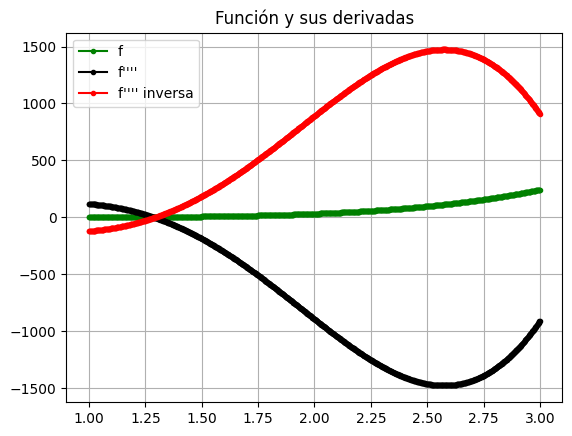

In [32]:
#Para abalizar la función y su derivada
x7=np.linspace(a_1,b_1,1000)
plt.figure()
plt.title('Función y sus derivadas')
plt.plot(x7,f4(x7),'.g-', label="f")
plt.plot(x7, d4f_5(x7), '.k-', label= "f''''")
plt.plot(x7,d4f_5_inversa(x7), '.r-', label="f'''' inversa")
plt.grid()
plt.legend()

In [33]:
#Calculando el máximo
maximo_4=sc.optimize.fmin_powell(d4f_5_inversa,0)
maximo_4

Optimization terminated successfully.
         Current function value: -129.552085
         Iterations: 2
         Function evaluations: 23


array([0.87647996])

$$n={-\frac{{(b-a)}^{5}}{2880 E} {f}^{(4)}(\xi)}^{1/4}$$

In [34]:
#Número de iteraciones
n_4=(abs((-((b_1-a_1)**5)*d4f_5(maximo_4[0]))/(2880*E_1)))*(1/4)
n_4

35986.69030025069

###**Comparación de los resultados obtenidos, con el método de Simpson de scipy**

In [35]:
#Con el código calculo
integral_f5_simpson=regla_simpson_compuesta(f5,1,3,int(n_4))
print(f'El resultado de la intergal con la formula es: {integral_f5_simpson}')
#Scipy
x7_mejorado=np.linspace(1,3,int(n_4))
integral_f5_sc_simpson=sc.integrate.simpson(f5(x7_mejorado),x7_mejorado)
print(f'El resultado con scipy es {integral_f5_sc_simpson}')


print(f'El resulado de scipy comparado con el obtenido al alplicar la formula de la integral de Simpson compuesta {integral_f5_simpson/integral_f5_sc_simpson}')


El resultado de la intergal con la formula es: 62.125684079966696
El resultado con scipy es 62.1276460450989
El resulado de scipy comparado con el obtenido al alplicar la formula de la integral de Simpson compuesta 0.9999684204173649


###**Cuadratura Gaussiana**

Calculando:
$$\int_{O}^{\pi/2} cos(x)+sin(x) \ dx$$

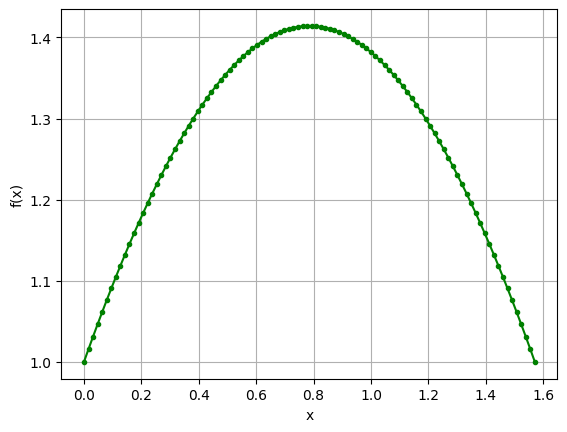

In [38]:
#Definiendo la función
f6=lambda x: np.cos(x)+np.sin(x)

#Graficandola
x_6=np.linspace(0,np.pi/2,100)
plt.figure()
plt.plot(x_6,f6(x_6),'.g-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()



In [40]:
integral_f6=sc.integrate.quad(f6, 0, np.pi/2)
print(f'El resultado de la integral es: {integral_f6[0]} y el error asosiado a su cálculo es {integral_f6[1]}')

El resultado de la integral es: 1.9999999999999998 y el error asosiado a su cálculo es 2.2204460492503128e-14
